In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
iris = pd.read_csv('./dataset/iris_dataset.csv')

In [19]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


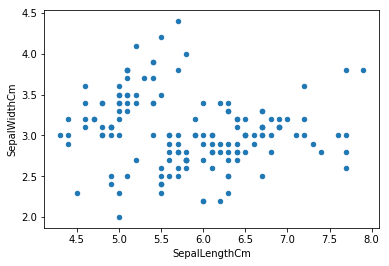

In [20]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")


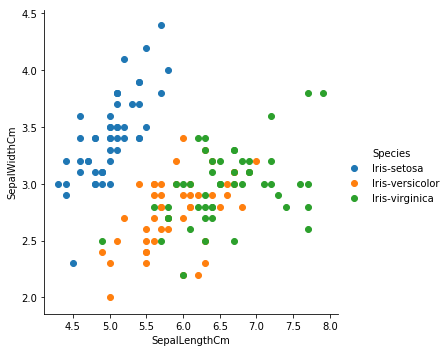

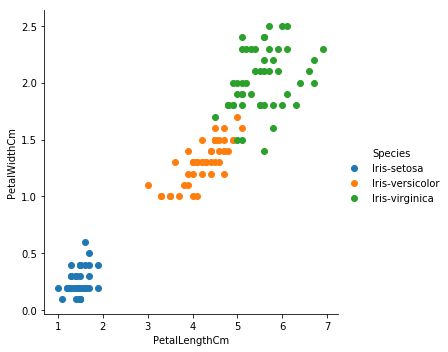

In [43]:
sns.FacetGrid(iris, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
sns.FacetGrid(iris, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()


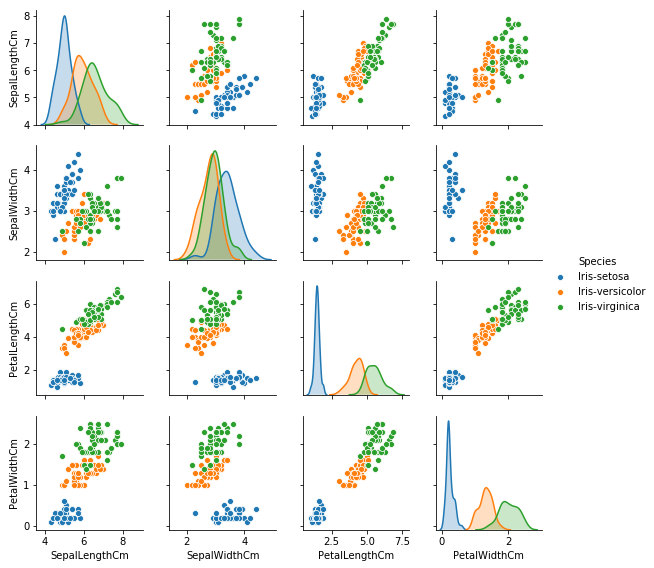

In [25]:
sns.pairplot(iris, hue="Species", height=2)

In [44]:
print("Shape is " , iris.shape)
print(iris.describe())
iris["Species"].value_counts()

Shape is  (150, 5)
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [38]:
array = iris.values
X = array[:,0:3]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [39]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name,model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train , cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)       


LR: 0.908333 (0.078617)
LDA: 0.966667 (0.055277)
KNN: 0.975000 (0.038188)
CART: 0.958333 (0.041667)
NB: 0.900000 (0.050000)
SVM: 0.975000 (0.038188)


[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

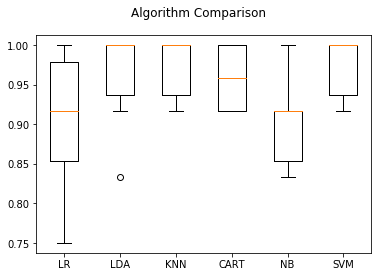

In [40]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.89      0.73      0.80        11

    avg / total       0.87      0.87      0.87        30

